## What is the most optimal skills to learn for Data Analysts?

### Methodology

1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

In [1]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [19]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [3]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [12]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = (df_DA_skills['skill_count'] / DA_job_count) * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


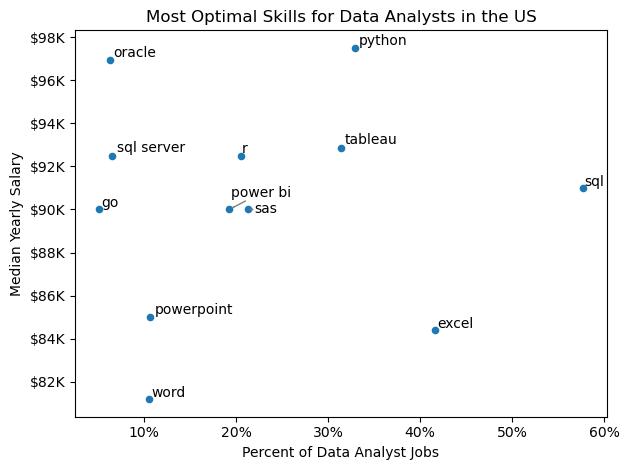

In [17]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts=[]
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


plt.tight_layout()
plt.show()

In [20]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['splunk',
  'word',
  'msaccess',
  'sharepoint',
  'sas',
  'ssis',
  'alteryx',
  'nuix',
  'spss',
  'microstrategy',
  'sap',
  'outlook',
  'powerbi',
  'sheets',
  'ssrs',
  'qlik',
  'looker',
  'powerpoint',
  'tableau',
  'excel',
  'dax',
  'power bi',
  'cognos',
  'datarobot',
  'esquisse',
  'visio',
  'ms access',
  'spreadsheet'],
 'programming': ['sql',
  'typescript',
  'lua',
  'scala',
  'delphi',
  'html',
  'julia',
  'vb.net',
  'sas',
  'no-sql',
  'apl',
  'c',
  'erlang',
  'matlab',
  'c++',
  'haskell',
  'nosql',
  'powershell',
  'pascal',
  'fortran',
  'objective-c',
  'solidity',
  'vba',
  'bash',
  'clojure',
  'dart',
  'golang',
  'rust',
  'java',
  'c#',
  'go',
  'r',
  'f#',
  'assembly',
  'ocaml',
  'mongo',
  'shell',
  'sass',
  'visual basic',
  'swift',
  'crystal',
  'javascript',
  'python',
  'php',
  'lisp',
  'visualbasic',
  'groovy',
  'ruby',
  'mongodb',
  'cobol',
  'elixir',
  'css',
  't-sql',
  'perl',
  'kot

In [22]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,splunk
0,analyst_tools,word
0,analyst_tools,msaccess
0,analyst_tools,sharepoint
0,analyst_tools,sas
...,...,...
9,sync,symphony
9,sync,wire
9,sync,mattermost
9,sync,twilio


In [23]:
df_DA_skills_high_demand.head(3)

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552


In [24]:
df_technology.head(3)

,technology,skills
0,analyst_tools,splunk
0,analyst_tools,word
0,analyst_tools,msaccess


In [27]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


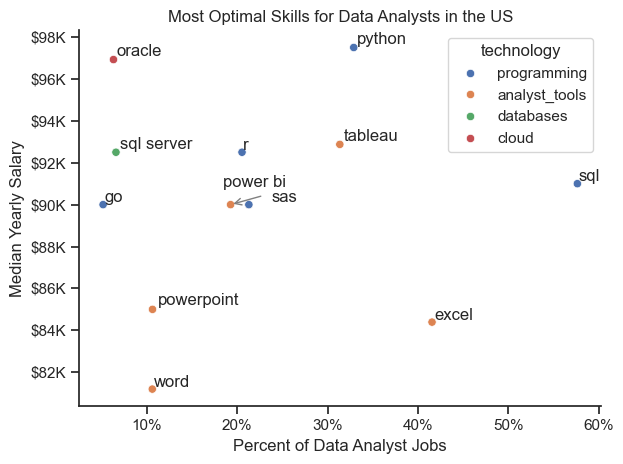

In [59]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts=[]
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(
    texts, 
    arrowprops=dict(arrowstyle="->", color='gray', lw=1),
    only_move={'points': 'y', 'text': 'y'},
    expand_text=(1.5, 1.5)
    )

for text in texts:
    if text.get_text() == "power bi":
        text.set_y(text.get_position()[1] + 600)  # Move Power BI higher
        text.set_x(text.get_position()[0] - 1)   # Slightly shift left
    if text.get_text() == "sas":
        text.set_y(text.get_position()[1] - 100)  # Move SAS lower
        text.set_x(text.get_position()[0] + 0.1)   # Slightly shift right

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


plt.tight_layout()
plt.show()